<a href="https://colab.research.google.com/github/khairililmi2468gmailcom/Game-Kita-Brick-Breaket/blob/main/Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import nest_asyncio
nest_asyncio.apply()

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00


In [ ]:
data = pd.read_csv('olahraga.csv', sep=';')


In [ ]:
data.count()

created_at             65
id_str                 65
full_text              65
quote_count            65
reply_count            65
retweet_count          65
favorite_count         65
lang                   65
user_id_str            65
conversation_id_str    65
username               65
tweet_url              65
dtype: int64

In [ ]:
data

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sat Nov 18 10:04:15 +0000 2023,1725817184927277279,"“Dulu oma juga pemain badminton, voli tukang s...",0,0,0,0,in,1142089971244736512,1725817184927277279,ab_by__,https://twitter.com/ab_by__/status/17258171849...
1,Sat Nov 18 10:03:57 +0000 2023,1725817107265560645,Mbti ku sekarang jadi M-UMET 😭🤙🏼. Kapan mas ...,0,0,0,0,in,1393122478856097794,1725817107265560645,Seowayy,https://twitter.com/Seowayy/status/17258171072...
2,Sat Nov 18 10:03:42 +0000 2023,1725817045009469584,@Pai_C1 Tahanan yang terpaksa melakukan krimin...,0,0,0,0,in,1622237105253670912,1725677371469238512,mkyrdy,https://twitter.com/mkyrdy/status/172581704500...
3,Sat Nov 18 10:02:24 +0000 2023,1725816716897481204,@patragumala orang gendut olahraga ga pake baj...,0,0,0,0,in,439803598,1725713544837267708,sebatberlima,https://twitter.com/sebatberlima/status/172581...
4,Sat Nov 18 10:02:20 +0000 2023,1725816700019638548,"Hujan, di rumah sendirian. Enaknya olahraga ni...",0,0,0,0,in,1688976552707657728,1725816700019638548,ridickkulus,https://twitter.com/ridickkulus/status/1725816...
...,...,...,...,...,...,...,...,...,...,...,...,...
60,Sat Nov 18 09:21:18 +0000 2023,1725806374498812101,@AGritje iyaaa terus karena yg jual bakso ga l...,0,1,0,0,in,2956808250,1725770311495483584,mleowy,https://twitter.com/mleowy/status/172580637449...
61,Sat Nov 18 09:20:57 +0000 2023,1725806287114416140,Banyak juga ya orang kita rela bayar untuk non...,0,0,0,0,in,68892881,1725806287114416140,bastian_lh,https://twitter.com/bastian_lh/status/17258062...
62,Sat Nov 18 09:19:40 +0000 2023,1725805965151440966,Lu pada tau olahraga fistball ngga sih?,0,1,0,0,in,2310885248,1725805965151440966,fauzanflaksono,https://twitter.com/fauzanflaksono/status/1725...
63,Sat Nov 18 09:18:54 +0000 2023,1725805769789210736,"Bnr bnr ya, seminggu ga olahraga samsek",0,1,0,0,in,91057814,1725805769789210736,nnariswari,https://twitter.com/nnariswari/status/17258057...


In [ ]:
tweets = data[['id_str', 'username', 'created_at', 'full_text', 'reply_count', 'retweet_count', 'favorite_count']]

In [ ]:
tweets

,id_str,username,created_at,full_text,reply_count,retweet_count,favorite_count
0,1723205325879423060,OlahragaSarana,Sat Nov 11 05:05:39 +0000 2023,@smapocke lfg,0,0,0
1,1723205236117139560,latewinternight,Sat Nov 11 05:05:18 +0000 2023,morning jgn lupa olahraga,0,0,0
2,1723205182153232526,awan_cerita,Sat Nov 11 05:05:05 +0000 2023,@diethingy Nder meskipun kamun diet seengaknya...,0,0,0
3,1723204398011285936,aysboo,Sat Nov 11 05:01:58 +0000 2023,Terus mual juga 2 hari kmrn. Sakit badan jg tp...,0,0,0
4,1723204327039545637,_indahfatmasari,Sat Nov 11 05:01:41 +0000 2023,plis ganteng bgt cwoku klo lg olahraga😭,0,0,0
5,1723203864067973212,catpricen,Sat Nov 11 04:59:51 +0000 2023,@Pakunegaran28 Mas Herman apkh tyda mw jadi co...,0,0,1
6,1723203525843505597,museuym,Sat Nov 11 04:58:30 +0000 2023,Olahraga siang dgn mengepel😌,0,0,1
7,1723203276257042459,fauzancapolista,Sat Nov 11 04:57:31 +0000 2023,Cek Atlana Set - One Set Jersey Zumba Yoga Ten...,0,0,0
8,1723203087387762947,Sekociontheboat,Sat Nov 11 04:56:46 +0000 2023,@meeoowrawr Biar semangat olahraga yhhh 🤩,0,0,0
9,1723203060972073349,ReihanTaine,Sat Nov 11 04:56:39 +0000 2023,Headset Bluetooth 5.0 Earphone Earpod i12 Olah...,1,0,0


In [ ]:
# Some functions for preprocessing text
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')


def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Preprocessing tweets data

tweets['text_clean'] = tweets['full_text'].apply(cleaningText)
tweets['text_clean'] = tweets['text_clean'].apply(casefoldingText)
tweets.drop(['full_text'], axis = 1, inplace = True)

tweets['text_preprocessed'] = tweets['text_clean'].apply(tokenizingText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(filteringText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
tweets.drop_duplicates(subset = 'text_clean', inplace = True)

#Export to csv file
tweets.to_csv(r'clean_tweets.csv', index = False, header = True,index_label=None)

tweets

,id_str,username,created_at,reply_count,retweet_count,favorite_count,text_clean,text_preprocessed
0,1725817184927277279,ab_by__,Sat Nov 18 10:04:15 +0000 2023,0,0,0,“dulu oma juga pemain badminton voli tukang sm...,"[, oma, main, badminton, voli, tukang, smash, ..."
1,1725817107265560645,Seowayy,Sat Nov 18 10:03:57 +0000 2023,0,0,0,mbti ku sekarang jadi mumet 😭🤙🏼 kapan mas wa...,"[mbti, ku, mumet, , mas, wayar, nikah, ak, ak,..."
2,1725817045009469584,mkyrdy,Sat Nov 18 10:03:42 +0000 2023,0,0,0,c tahanan yang terpaksa melakukan kriminal unt...,"[c, tahan, paksa, kriminal, hidup, anak, istri..."
3,1725816716897481204,sebatberlima,Sat Nov 18 10:02:24 +0000 2023,0,0,0,orang gendut olahraga ga pake baju kaya orang ...,"[orang, gendut, olahraga, ga, pake, baju, kaya..."
4,1725816700019638548,ridickkulus,Sat Nov 18 10:02:20 +0000 2023,0,0,0,hujan di rumah sendirian enaknya olahraga nih ...,"[hujan, rumah, enak, olahraga, nih, sampe, rea..."
...,...,...,...,...,...,...,...,...
60,1725806374498812101,mleowy,Sat Nov 18 09:21:18 +0000 2023,1,0,0,iyaaa terus karena yg jual bakso ga lewat bapa...,"[iyaaa, yg, jual, bakso, ga, gowes, olahraga]"
61,1725806287114416140,bastian_lh,Sat Nov 18 09:20:57 +0000 2023,0,0,0,banyak juga ya orang kita rela bayar untuk non...,"[ya, orang, rela, bayar, nonton, seleb, main, ..."
62,1725805965151440966,fauzanflaksono,Sat Nov 18 09:19:40 +0000 2023,1,0,0,lu pada tau olahraga fistball ngga sih,"[lu, tau, olahraga, fistball, ngga, sih]"
63,1725805769789210736,nnariswari,Sat Nov 18 09:18:54 +0000 2023,1,0,0,bnr bnr ya seminggu ga olahraga samsek,"[bnr, bnr, ya, minggu, ga, olahraga, samsek]"


In [ ]:
# Because preprocessing tweets data takes a lot time, so I load tweets data which has been preprocessed before
tweets = pd.read_csv('clean_tweets.csv')

for i, text in enumerate(tweets['text_preprocessed']):
    tweets['text_preprocessed'][i] = tweets['text_preprocessed'][i].replace("'", "")\
                                            .replace(',','').replace(']','').replace('[','')
    list_words=[]
    for word in tweets['text_preprocessed'][i].split():
        list_words.append(word)

    tweets['text_preprocessed'][i] = list_words

tweets



,id_str,username,created_at,reply_count,retweet_count,favorite_count,text_clean,text_preprocessed
0,1725817184927277279,ab_by__,Sat Nov 18 10:04:15 +0000 2023,0,0,0,“dulu oma juga pemain badminton voli tukang sm...,"[oma, main, badminton, voli, tukang, smash, te..."
1,1725817107265560645,Seowayy,Sat Nov 18 10:03:57 +0000 2023,0,0,0,mbti ku sekarang jadi mumet 😭🤙🏼 kapan mas wa...,"[mbti, ku, mumet, mas, wayar, nikah, ak, ak, c..."
2,1725817045009469584,mkyrdy,Sat Nov 18 10:03:42 +0000 2023,0,0,0,c tahanan yang terpaksa melakukan kriminal unt...,"[c, tahan, paksa, kriminal, hidup, anak, istri..."
3,1725816716897481204,sebatberlima,Sat Nov 18 10:02:24 +0000 2023,0,0,0,orang gendut olahraga ga pake baju kaya orang ...,"[orang, gendut, olahraga, ga, pake, baju, kaya..."
4,1725816700019638548,ridickkulus,Sat Nov 18 10:02:20 +0000 2023,0,0,0,hujan di rumah sendirian enaknya olahraga nih ...,"[hujan, rumah, enak, olahraga, nih, sampe, rea..."
...,...,...,...,...,...,...,...,...
60,1725806374498812101,mleowy,Sat Nov 18 09:21:18 +0000 2023,1,0,0,iyaaa terus karena yg jual bakso ga lewat bapa...,"[iyaaa, yg, jual, bakso, ga, gowes, olahraga]"
61,1725806287114416140,bastian_lh,Sat Nov 18 09:20:57 +0000 2023,0,0,0,banyak juga ya orang kita rela bayar untuk non...,"[ya, orang, rela, bayar, nonton, seleb, main, ..."
62,1725805965151440966,fauzanflaksono,Sat Nov 18 09:19:40 +0000 2023,1,0,0,lu pada tau olahraga fistball ngga sih,"[lu, tau, olahraga, fistball, ngga, sih]"
63,1725805769789210736,nnariswari,Sat Nov 18 09:18:54 +0000 2023,1,0,0,bnr bnr ya seminggu ga olahraga samsek,"[bnr, bnr, ya, minggu, ga, olahraga, samsek]"


# Determine Sentiment Polarity of Tweets with Indonesia Sentiment Lexicon

In [ ]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('lexicon_positive.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

FileNotFoundError: ignored

In [ ]:
# Results from determine sentiment polarity of tweets

results = tweets['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]
print(tweets['polarity'].value_counts())

# Export to csv file
# tweets.to_csv(r'25k_tweets_data_clean_polarity.csv', index = False, header = True,index_label=None)

tweets

negative    23
positive    18
neutral      8
Name: polarity, dtype: int64


,id_str,username,created_at,reply_count,retweet_count,favorite_count,text_clean,text_preprocessed,polarity_score,polarity
0,1723205325879423060,OlahragaSarana,Sat Nov 11 05:05:39 +0000 2023,0,0,0,lfg,[lfg],0,neutral
1,1723205236117139560,latewinternight,Sat Nov 11 05:05:18 +0000 2023,0,0,0,morning jgn lupa olahraga,"[morning, jgn, lupa, olahraga]",-2,negative
2,1723205182153232526,awan_cerita,Sat Nov 11 05:05:05 +0000 2023,0,0,0,nder meskipun kamun diet seengaknya hargain or...,"[nder, kamun, diet, seengaknya, hargain, orang...",-16,negative
3,1723204398011285936,aysboo,Sat Nov 11 05:01:58 +0000 2023,0,0,0,terus mual juga hari kmrn sakit badan jg tp g...,"[mual, kmrn, sakit, badan, jg, tp, gatau, aing...",-18,negative
4,1723204327039545637,_indahfatmasari,Sat Nov 11 05:01:41 +0000 2023,0,0,0,plis ganteng bgt cwoku klo lg olahraga😭,"[plis, ganteng, bgt, cwoku, klo, lg, olahraga]",0,neutral
5,1723203864067973212,catpricen,Sat Nov 11 04:59:51 +0000 2023,0,0,1,mas herman apkh tyda mw jadi coach olahraga ku...,"[mas, herman, apkh, tyda, mw, coach, olahraga,...",0,neutral
6,1723203525843505597,museuym,Sat Nov 11 04:58:30 +0000 2023,0,0,1,olahraga siang dgn mengepel😌,"[olahraga, siang, dgn, kepel]",0,neutral
7,1723203276257042459,fauzancapolista,Sat Nov 11 04:57:31 +0000 2023,0,0,0,cek atlana set one set jersey zumba yoga teni...,"[cek, atlana, set, one, set, jersey, zumba, yo...",0,neutral
8,1723203087387762947,Sekociontheboat,Sat Nov 11 04:56:46 +0000 2023,0,0,0,biar semangat olahraga yhhh 🤩,"[biar, semangat, olahraga, yhhh]",1,positive
9,1723203060972073349,ReihanTaine,Sat Nov 11 04:56:39 +0000 2023,1,0,0,headset bluetooth earphone earpod i olahraga ...,"[headset, bluetooth, earphone, earpod, i, olah...",4,positive


## Analysis and Visualization

### Comparasion Sentiment Polarity on Tweets Data

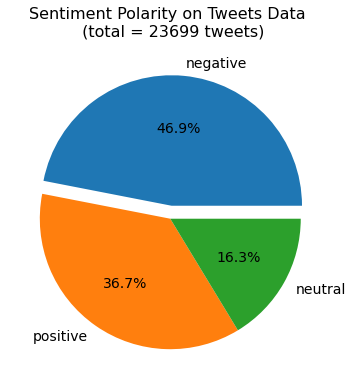

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in tweets['polarity'].value_counts()]
labels = list(tweets['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data \n (total = 23699 tweets)', fontsize = 16, pad = 20)
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
1,saksikan program damai indonesiaku dengan tema “mewujudkan kepahlawanan pemuda di jalan allah bersama kh m asrorun niam kh m cholil nafis ustadzah ebira hasanatina dan diihadiri oleh ario bimo nandito ariotedjo mentri pemuda dan olahraga ri sabtu november,10,positive
2,ㅤ good morning kak habis olahraga ya ㅤ,9,positive
3,bener olahraga sekedar untuk sehat dan kuat ya jun bukan untuk bentuk otot 👍🏻,8,positive
4,hotto itu bukan sereal bukan oatmeal bukan meal replacement apalagi fiber drink jawaban yang benar itu hotto adalah teman teman olahraga paling setia teman yang paling ngerti sama kesehatan kita teman yang paling bisa diandalkan teman yang paling bisa dipercaya,7,positive
5,nonton original series dan ratusan tayangan olahraga dengan vidio diamond tri kamu sekarang yuk cek linknya disini👉,6,positive
6,yang melaksanakan salat di pinggir sirkuit mandalika adalah contoh nyata semangat dan kesetiaan dalam menjalankan tugas ini menunjukkan betapa pentingnya nilainilai keagamaan dan disiplin dalam dunia olahraga semoga kisah ini bisa,5,positive
7,udah siang ini mah masa tidur terus ayo kita olahraga biar sehat dan kuat menghadapi kenyataan hidup yang berat💪🏻,4,positive
8,ajak guru olahraga glamping sambil fitnes kenapa tidak,4,positive
9,headset bluetooth earphone earpod i olahraga wireless warna kualitas 💰 💰,4,positive
10,siapkan tikar elastis yang bisa digunakan untuk olahraga atau bermain,4,positive


In [ ]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = tweets[tweets['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:10]

,text_clean,polarity_score,polarity
1,eks persebaya jadi official kanada di piala dunia u 👇 mantan pemain persebaya raphael maitimo hadir membantu untuk kanada selama pelaksanaan piala dunia u ia menjadi salah… via,-22,negative
2,pmo emang terlepas dari larangan agama dampaknya emang ga bagus karena tangan kan tempatnya kuman ya bisa bikin vagine infeksi bisa disalurkan sama olahraga kalo bosen bisa gonta ganti jenis olahraga atau buat nahan bisa untuk puasa,-20,negative
3,terus mual juga hari kmrn sakit badan jg tp gatau apa karena aing kmrn sempet olahraga ya jadi sakit badan heuheu,-18,negative
4,nder meskipun kamun diet seengaknya hargain orang yang mentraktir kamu makan kamu makan high calorie cuma ini aja kan santai aja ga sih gausah dibawa ribet kamu tinggal disiplin olahraga dan ngejaga makan selanjutnya gausah dibikin pusing lah,-16,negative
5,padahal tinggal abis makan itu olahraga besoknya back on track lagi apa susahnya… gaakan langsung naik kg atau menghambat dietnya 😂,-12,negative
6,inggris brasil dan argentina memulai kiprah di piala dunia u hari ini 👇 rangkaian pertandingan dalam babak grup piala dunia u berlanjut pada sabtu hari ini kali… via,-12,negative
7,sinting perasaan sengaconye lingkungan gue kaga ada yg begini dah siap salam olahraga di sel kocok pake balsem geliga,-10,negative
8,fakta pierluigi collina wasit killer era an klub olahraga favoritnya bukan sepak bola,-9,negative
9,olahraga ini hanya jd tunggangan politik prestasi tdk pernah mendunia hanya diambil jargonnya,-8,negative
10,noon olahraga makanya biar nggak jompo😂,-7,negative


### Word Cloud

In [ ]:
# # Visualize word cloud

# list_words=''
# for tweet in tweets['text_preprocessed']:
#     for word in tweet:
#         list_words += ' '+(word)

# wordcloud = WordCloud(
#     width=600, height=400, background_color='black',
#     min_font_size=10
# ).generate(list_words)

# fig, ax = plt.subplots(figsize = (8, 6))
# ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
# ax.grid(False)
# plt.imshow((wordcloud))
# fig.tight_layout(pad=0)
# ax.axis('off')
# plt.show()

### Positive and Negative Word Cloud

In [ ]:
# Function to group all positive/negative words
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = lexicon_positive[word]
        if (word in lexicon_negative):
            score_neg = lexicon_negative[word]

        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)

    return positive_words, negative_words

In [ ]:
# # Visualize positive and negative word cloud

# sentiment_words = tweets['text_preprocessed'].apply(words_with_sentiment)
# sentiment_words = list(zip(*sentiment_words))
# positive_words = sentiment_words[0]
# negative_words = sentiment_words[1]

# fig, ax = plt.subplots(1, 2,figsize = (12, 10))
# list_words_postive=''
# for row_word in positive_words:
#     for word in row_word:
#         list_words_postive += ' '+(word)
# wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
#                                , min_font_size = 10).generate(list_words_postive)
# ax[0].set_title('Word Cloud of Positive Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
# ax[0].grid(False)
# ax[0].imshow((wordcloud_positive))
# fig.tight_layout(pad=0)
# ax[0].axis('off')

# list_words_negative=''
# for row_word in negative_words:
#     for word in row_word:
#         list_words_negative += ' '+(word)
# wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
#                                , min_font_size = 10).generate(list_words_negative)
# ax[1].set_title('Word Cloud of Negative Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
# ax[1].grid(False)
# ax[1].imshow((wordcloud_negative))
# fig.tight_layout(pad=0)
# ax[1].axis('off')

# plt.show()

### Counts of Tweets Created based on Hours


In [ ]:
# import seaborn as sns
# sns.set(style = 'whitegrid')
# import datetime as dt

# # Visualize counts of tweets created based on hours

# #pd.plotting.register_matplotlib_converters()
# tweets_created = pd.DataFrame()
# tweets_created['created_at'] = tweets['created_at'].str.split(' ', expand = True)[1]
# tweets_created['created_at'] = pd.to_datetime(tweets_created['created_at'])
# tweets_created['created_at']= tweets_created['created_at'].dt.round('H')
# tweets_created['created_at'] = tweets_created['created_at'].dt.time
# tweets_created

In [ ]:
# dataBaru = pd.DataFrame(y_values)
# dataBaru['time'] = dataBaru.index
# dataBaru.reset_index(inplace = True)
# dataBaru['time'] = dataBaru['time'].astype(str)
# dataBaru.drop(columns = ['index'], inplace = True)
# dataBaru

In [ ]:
# fig, ax = plt.subplots(figsize = (12, 4))
# x_values = tweets_created['created_at'].value_counts().sort_index().index
# y_values = tweets_created['created_at'].value_counts().sort_index()
# sns.lineplot(ax = ax, data = dataBaru, x ='time', y = 'created_at')

# ax.set_title('Count of Tweets Created \n (based on hours)', fontsize = 18)
# ax.set_xlabel('Hours')
# ax.set_xticks(dataBaru['time'])
# ax.set_xticklabels(dataBaru['time'], rotation = 45)
# ax.set_ylabel('Count')
# plt.show()